# TD 15 - 16 : MECA511
## Analyse d'un champ de déplacement mesurée expérimentalement par corrélation d'images

### Objectif :
Les mesures expérimentales par corrélation d'image permettent d'obtenir le champ de déplacement à la surface d'un objet soumis à une sollicitation mécanique.
Dans ces 2 TDs nous allons :
1. Analyser un champ de déplacement mesuré expérimentalement par corrélation d'images
2. Déterminer les déformations à partir de ce champ de déplacement
3. Calculer les contraintes à partir des déformations en faisant l'hypothèse d'un matériau isotrope linéaire élastique
4. Estimer l'effort de traction appliqué sur l'éprouvette
5. Vérifier si l'état de contrainte respecte les équations d'équilibre locales

### Contexte :
Le travail proposé en TD est inspiré de l'article : J.-C. Passieux, F. Bugarin, C. David, J.-N. Périé, L. Robert, Multiscale Displacement Field Measurement Using Digital Image Correlation: Application to the Identification of Elastic Properties, Exp Mech 55 (2015) 121–137. Une copie de l'article est jointe à ce notebbok.

### Installation des librairies
Pour installer les librairies nécessaires pour ce TD, exécuter la cellule suivante, puis redémarrer le kernel.

In [1]:
#pip install git+https://gitlab.com/symmehub/py7DPost

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import py7DPost.core as py7D
%matplotlib ipympl


### Fonction de dérivation numérique
Si l'on souhaite calculer la dérivée de $u_x(x,y)$ par rapport à $x$ on peut utiliser les fonctions suivantes 
```python
dux_dx = diff_x(ux)
```
de même pour la dérivée par rapport à $y$
```python
dux_dy = diff_y(ux)
```

In [3]:
def diff_x(V):
    return np.gradient(V, X[0],axis=1)

def diff_y(V):
    return np.gradient(V, Y[:,1],axis=0)


### Import des données expérimentales de mesure du champ de déplacement

In [4]:
data = py7D.read7DData('data\DIC_data.mat')

# convert dictionary data to variable
pix2mm = data["pix2mm"]
X_pix = data['X'] 
Y_pix = data['Y']
X = X_pix * pix2mm
Y = Y_pix * pix2mm
ux = data['dx'][-1] * pix2mm
uy = data['dy'][-1] * pix2mm

no data named exx in 7D mat file.
no data named eyy in 7D mat file.
no data named exy in 7D mat file.


### Import de l'image de l'éprouvette en configuration déformée


In [5]:
path_img = 'data\ohtcfrp_11.tif'
img = plt.imread(path_img)[::-1]


### Tracée des champs de déplacement

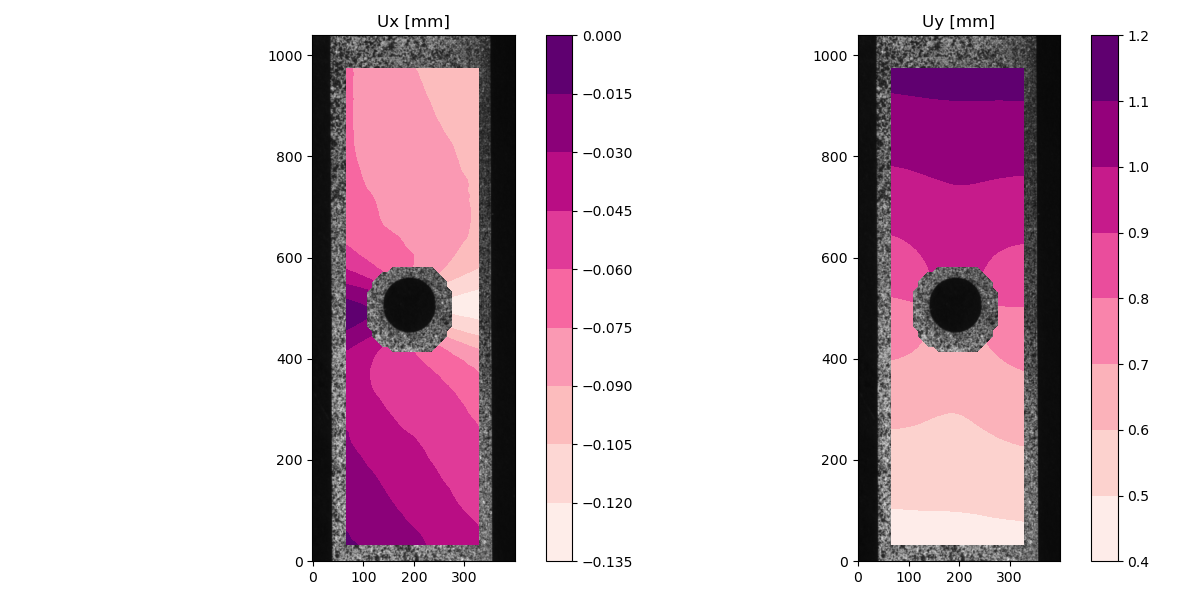

In [6]:
cmap = plt.cm.RdPu
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ux
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, ux, cmap=cmap)
axes[0].set_title('Ux [mm]')
fig.colorbar(cax1, ax=axes[0])

# Plot uy
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, uy, cmap=cmap)
axes[1].set_title('Uy [mm]')
fig.colorbar(cax2, ax=axes[1])
plt.tight_layout()
plt.show()

## Q1 : Calcul des déformations
Sur la base des champs de déplacement mesurés, calculer les déformations $\varepsilon_{xx}$, $\varepsilon_{yy}$ et $\varepsilon_{xy}$.

Pour cela appuyez-vous sur les fonctions de dérivation numérique définie plus haut.


In [7]:
# TODO
exx = np.zeros_like(ux)
eyy = np.zeros_like(ux)
exy = np.zeros_like(ux)

In [8]:
# Solution
ux_dx = diff_x(ux)
uy_dy = diff_y(uy)
ux_dy = diff_y(ux)
uy_dx = diff_x(uy)

exx = ux_dx
eyy = uy_dy
exy = 0.5*(uy_dx + ux_dy)


### Tracée des champs de déformation

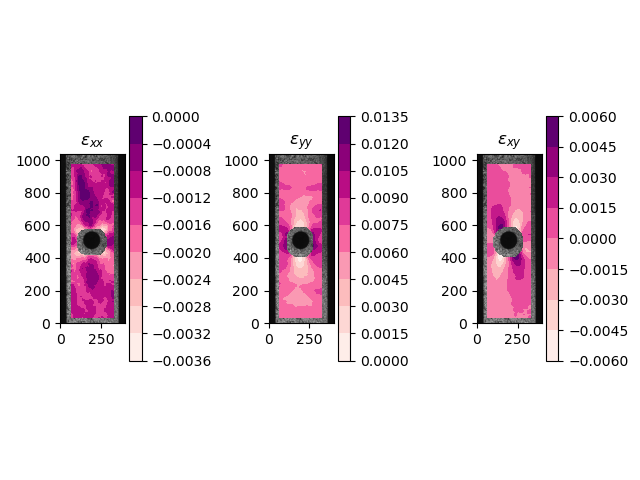

In [9]:
fig, axes = plt.subplots(1, 3)

# Plot exx
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, exx, cmap=cmap)
axes[0].set_title('$\epsilon_{xx}$')
fig.colorbar(cax1, ax=axes[0])

# Plot eyy
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, eyy, cmap=cmap)
axes[1].set_title('$\epsilon_{yy}$')
fig.colorbar(cax2, ax=axes[1])

# Plot exy
axes[2].imshow(img, origin='lower')
cax3 = axes[2].contourf(X_pix, Y_pix, exy, cmap=cmap)
axes[2].set_title('$\epsilon_{xy}$')
fig.colorbar(cax3, ax=axes[2])
plt.tight_layout()
plt.show()

## Q2 : Calcul de la déformation normale suivant z
En supposant que :
- l'éprouvette est mince,
- et le matériau est isotrope élastique

Calculer la déformation normale suivant z $\varepsilon_{zz}$.

On prendra $E = 21 GPa$ et $\nu = 0.15$.

Solution :

Loi Lineaire elastique isotrope :
$$
\sigma_{zz} = \lambda tr(\varepsilon) + 2\mu \varepsilon_{zz}
$$

Hypothèse de contrainte plane:
$$
\sigma_{zz} = 0
$$

d'ou :
$$
0 = \lambda (\varepsilon_{xx} + \varepsilon_{yy} + \varepsilon_{zz} )+ 2\mu \varepsilon_{zz}
$$

$$
\varepsilon_{zz} = -\frac{\lambda}{2\mu + \lambda}(\varepsilon_{xx} + \varepsilon_{yy})
$$

In [10]:
# TODO

ezz = np.zeros_like(ux)

In [11]:
# Solution
E = 21e3 #MPa
nu = 0.15

# coef de Lamé
mu = E/(2*(1+nu))
lamb = E*nu/((1+nu)*(1-2*nu))
# ezz
ezz = -lamb/( 2*mu + lamb )*(exx + eyy)

### Trace du champ de déformation normale suivant z

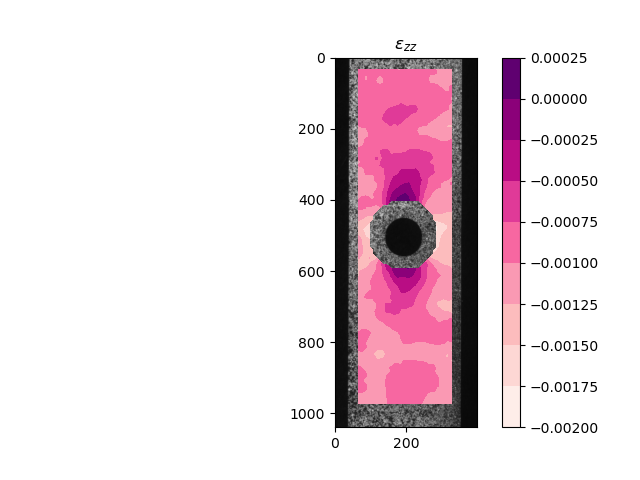

In [12]:
plt.figure()
plt.imshow(img)
plt.contourf(X_pix,Y_pix,ezz, cmap=cmap)
plt.title('$\epsilon_{zz}$')
plt.colorbar()
plt.show()

## Q3 : Calcul du tenseur des contraintes
En appliquant l'hypothèse de contrainte plane et la loi de Hooke, calculer le tenseur des contraintes $\sigma_{xx}$, $\sigma_{yy}$ et $\sigma_{xy}$.

In [13]:
# TODO
sigxx = np.zeros_like(ux)
sigyy = np.zeros_like(ux)
sigxy = np.zeros_like(ux)


In [14]:
# Solution
tr_eps = exx + eyy + ezz

sigxx = lamb*tr_eps + 2*mu*exx
sigyy = lamb*tr_eps + 2*mu*eyy
sigxy = 2*mu*exy

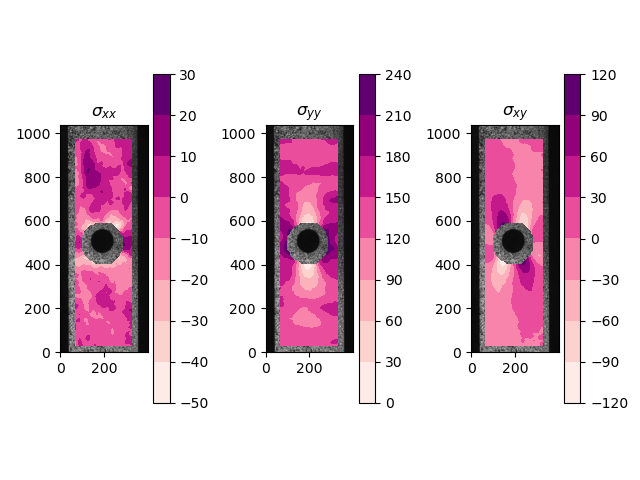

In [15]:
fig, axes = plt.subplots(1, 3)

# Plot sigxx
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, sigxx, cmap=cmap)
axes[0].set_title('$\sigma_{xx}$')
fig.colorbar(cax1, ax=axes[0])

# Plot sigyy
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, sigyy, cmap=cmap)
axes[1].set_title('$\sigma_{yy}$')
fig.colorbar(cax2, ax=axes[1])

# Plot sigxy
axes[2].imshow(img, origin='lower')
cax3 = axes[2].contourf(X_pix, Y_pix, sigxy, cmap=cmap)
axes[2].set_title('$\sigma_{xy}$')
fig.colorbar(cax3, ax=axes[2])
plt.tight_layout()
plt.show()

## Q4 : Intégration des contraintes et calcul de la force de traction suivant y en haut de l'éprouvette
En intégrant les contraintes suivant x, calculer la force de traction appliquée sur l'éprouvette.

On répètera ce calcul sur une coupure fictive en haut puis en bas de l'éprouvette.

Ces valeurs doivent être égales, pourquoi ?
Le sont-elles ? Si non, pourquoi ?

L'épaisseur de l'éprouvette est de 1.26 mm.

In [16]:
# TODO
Fy_haut = 0. 
Fy_bas = 0.

In [17]:
ds = X[0,1] - X[0,0]
ds *= 1.26 # eppaiseur en mm
Fy_haut = (sigyy[0,:] * ds).sum()

Fy_bas = (sigyy[-1,:] * ds).sum()

print('Fy_haut =', Fy_haut, 'N')
print('Fy_bas =', Fy_bas, 'N')

Fy_haut = 4812.924151510682 N
Fy_bas = 4508.540768714848 N


## Q5 : Équilibre local
On souhaite vérifier si l'état de contrainte respecte les équations d'équilibre locales.
$$
\vec{div}(\sigma) + \vec f = \vec 0
$$
Ici on néglige les forces de volume, donc :
$$
\vec{div}(\sigma) = \vec 0
$$


Que pensez-vous des valeurs obtenues de $\vec{div}(\sigma)$ ?

Que peut-on en conclure ? Quelles sont les pistes d'amélioration ?

In [18]:
# TODO


# composanates de div sigma
div_x = np.zeros_like(ux)
div_y = np.zeros_like(ux)

In [19]:
# Solution
sigxx_dx = diff_x(sigxx)
sigxy_dx = diff_x(sigxy)

sigyy_dy = diff_y(sigyy)
sigxy_dy = diff_y(sigxy)


# div sigma
div_x = sigxx_dx + sigxy_dy
div_y = sigxy_dx + sigyy_dy

### Trace des composantes de $\vec{div}(\sigma)$

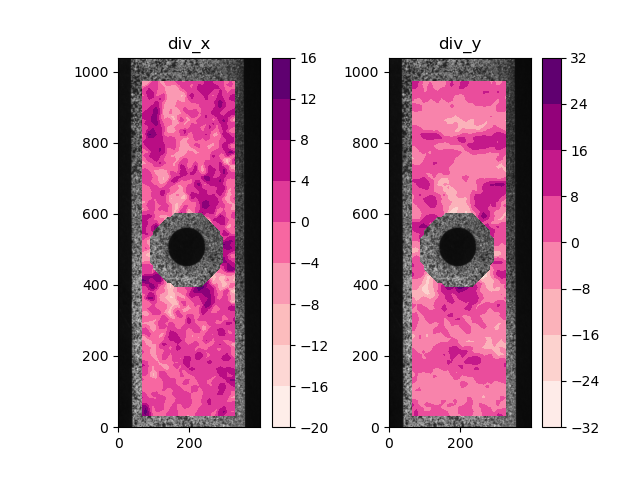

In [20]:
fig, axes = plt.subplots(1, 2)

# Plot div_x
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, div_x, cmap=cmap)
axes[0].set_title('div_x')
fig.colorbar(cax1, ax=axes[0])

# Plot div_y
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, div_y, cmap=cmap)
axes[1].set_title('div_y')
fig.colorbar(cax2, ax=axes[1])

plt.show()

## Q6 : avec une loi de comportement plus riche


D'après l'article, le matériau est orthotrope, et non isotrope avec les propriétés suivantes :

$E_y$ = 20 Gpa

$E_x$ = 14 GPa

$\nu_{xy}$ = 0.3

$G_{xy}$ = 2 Gpa

Loi élastique orthotrope linéaire (ref : https://help.solidworks.com/2021/english/solidworks/cworks/c_Linear_Elastic_Orthotropic.htm) dans le cas de contrainte plane s'exprime :
$$
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy}
\end{bmatrix}
=
\begin{bmatrix}
\frac{E_y}{1 - \nu_{yx} \nu_{xy}} & \frac{\nu_{yx} E_x}{1 - \nu_{yx} \nu_{xy}} & 0 \\
\frac{\nu_{xy} E_y}{1 - \nu_{yx} \nu_{xy}} & \frac{E_x}{1 - \nu_{yx} \nu_{xy}} & 0 \\
0 & 0 & 2G_{yx}
\end{bmatrix}
\begin{bmatrix}
\varepsilon_{xx} \\
\varepsilon_{yy} \\
\varepsilon_{xy}
\end{bmatrix}.
$$



- Recaluler les contraint avec cette nouvelle hypothèse
- Recalculer la force de traction
- Recalculer $\vec{div}(\sigma)$
- Que pensez-vous des valeurs obtenues de $\vec{div}(\sigma)$ ?

In [21]:
# TODO


In [22]:
# Solution - contraintes
Ey = 20e3
Ex = 14e3
nuxy = 0.3
Gxy = 2e3

sigxx = Ex/(1-nuxy**2)*exx
sigyy = Ey/(1-nuxy**2)*eyy
sigxy = 2*Gxy*exy

In [23]:
# Solution - div sigma
sigxx_dx = diff_x(sigxx)
sigxy_dx = diff_x(sigxy)

sigyy_dy = diff_y(sigyy)
sigxy_dy = diff_y(sigxy)

# div sigma
div_x = sigxx_dx + sigxy_dy
div_y = sigxy_dx + sigyy_dy

### Trace des composante de $\vec{div}(\sigma)$

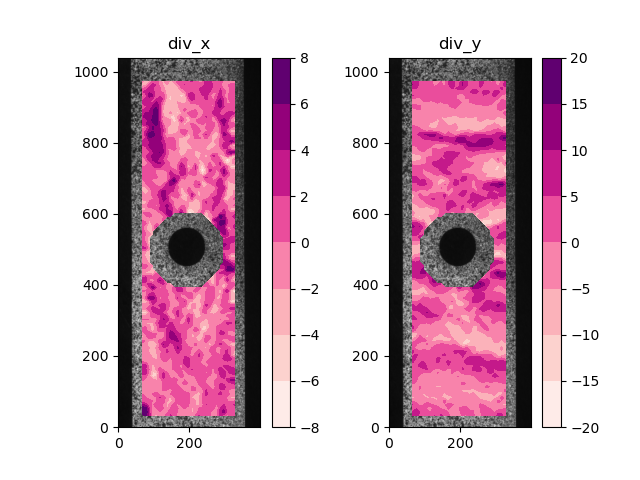

In [24]:
fig, axes = plt.subplots(1, 2)

# Plot div_x
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, div_x, cmap=cmap)
axes[0].set_title('div_x')
fig.colorbar(cax1, ax=axes[0])

# Plot div_y
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, div_y, cmap=cmap)
axes[1].set_title('div_y')
fig.colorbar(cax2, ax=axes[1])

plt.show()

## Q7 : Contrainte et direction principales
Calculer les contraintes et les directions principales.

In [25]:
Sig_I = np.zeros_like(ux)
Sig_II = np.zeros_like(ux)
Theta_I = np.zeros_like(ux)


In [26]:
# Solution
Sig_I = 0.5*(sigxx + sigyy) + np.sqrt(0.25*(sigxx - sigyy)**2 + sigxy**2)
Sig_II = 0.5*(sigxx + sigyy) - np.sqrt(0.25*(sigxx - sigyy)**2 + sigxy**2)
Theta_I = np.arctan(sigxy/(sigxx - Sig_II) )

### Trace des contraintes principales

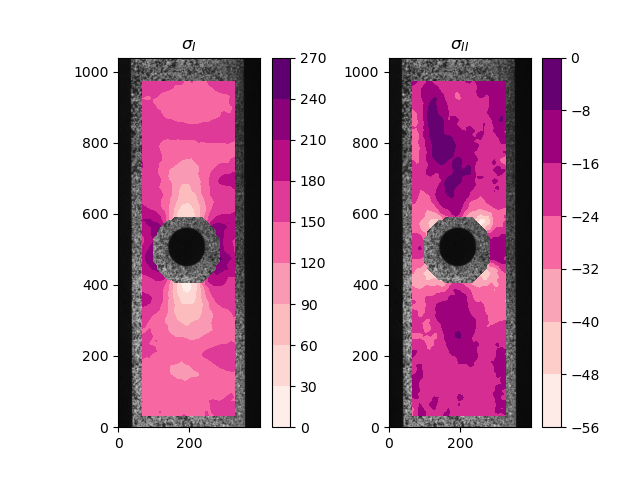

In [27]:
fig, axes = plt.subplots(1, 2)

# Plot div_x
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, Sig_I, cmap=cmap)
axes[0].set_title('$\sigma_I$')
fig.colorbar(cax1, ax=axes[0])

# Plot div_y
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, Sig_II, cmap=cmap)
axes[1].set_title('$\sigma_{II}$')
fig.colorbar(cax2, ax=axes[1])

plt.show()

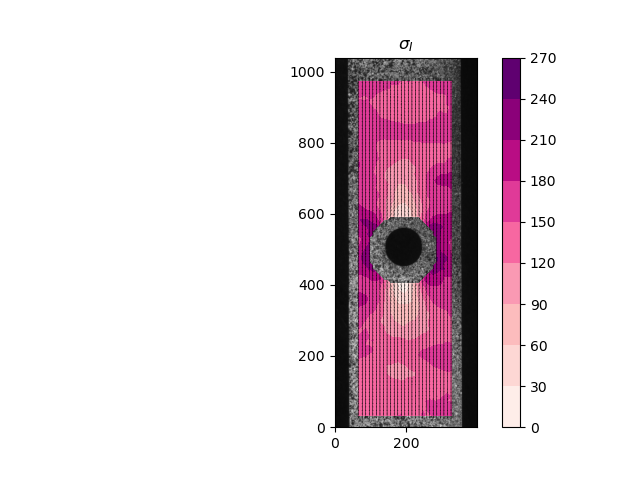

In [28]:
fig, axes = plt.subplots(1, 1)

# Plot div_x
axes.imshow(img, origin='lower')
cax1 = axes.contourf(X_pix, Y_pix, Sig_I, cmap=cmap)
axes.quiver(X_pix, Y_pix, np.cos(Theta_I), np.sin(Theta_I),  pivot='mid', scale=1 / 0.05)
axes.set_title('$\sigma_I$')
fig.colorbar(cax1, ax=axes)

## Q8 : Calcul de la contrainte équivalente de von Mises
- Calculer la contrainte équivalente de von Mises.

- La limite d'élasticité du matériau est d’environ 250 MPa. Y a-t-il des zones de l'éprouvette qui sont critiques ?

In [29]:
# TODO
sig_eq = np.zeros_like(ux)

In [30]:
# Solution
sig_eq = np.sqrt(Sig_I**2 + Sig_II**2 - Sig_I*Sig_II)

### Trace de la contrainte equivalente de Von Mises

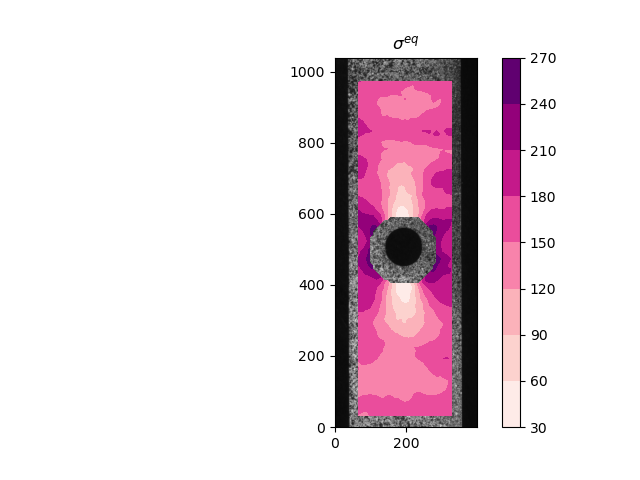

In [31]:
fig, axes = plt.subplots(1, 1)

# Plot div_x
axes.imshow(img, origin='lower')
cax1 = axes.contourf(X_pix, Y_pix, sig_eq, cmap=cmap)
axes.set_title('$\sigma^{eq}$')
fig.colorbar(cax1, ax=axes)